In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [7]:
traf = ctrl.Antecedent(np.arange(0, 3, 0.1), 'Traffic')
dist = ctrl.Antecedent(np.arange(0, 15, 0.1), 'Distance')
weat = ctrl.Antecedent(np.arange(0, 3, 0.1), 'Weather')
prept = ctrl.Antecedent(np.arange(0, 30, 0.1), 'PrepTime')
fati = ctrl.Antecedent(np.arange(0, 3, 0.1), 'Fatigue')

deli = ctrl.Consequent(np.arange(0, 3, 0.1), 'DeliveryTime')
bonus = ctrl.Consequent(np.arange(0, 3, 0.1), 'Bonus')
perf = ctrl.Consequent(np.arange(0, 3, 0.1), 'Performance')

In [8]:
traf['L'] = fuzz.gaussmf(traf.universe, 0, 0.5)
traf['M'] = fuzz.gaussmf(traf.universe, 1.5, 0.5)
traf['H'] = fuzz.gaussmf(traf.universe, 2.5, 0.5)

In [9]:
dist['S'] = fuzz.gaussmf(dist.universe, 2, 1)
dist['M'] = fuzz.gaussmf(dist.universe, 6, 1)
dist['L'] = fuzz.gaussmf(dist.universe, 12, 1)

In [10]:
weat['C'] = fuzz.gaussmf(weat.universe, 0, 0.5)
weat['R'] = fuzz.gaussmf(weat.universe, 1, 0.5)
weat['S'] = fuzz.gaussmf(weat.universe, 2, 0.5)

In [11]:
prept['F'] = fuzz.gaussmf(prept.universe, 3, 2)
prept['M'] = fuzz.gaussmf(prept.universe, 10, 2)
prept['S'] = fuzz.gaussmf(prept.universe, 20, 2)


In [12]:
fati['L'] = fuzz.gaussmf(fati.universe, 0, 0.5)
fati['M'] = fuzz.gaussmf(fati.universe, 1, 0.5)
fati['H'] = fuzz.gaussmf(fati.universe, 2, 0.5)

In [13]:
deli['S'] = fuzz.trimf(deli.universe, [0, 0, 1])
deli['M'] = fuzz.trimf(deli.universe, [0, 1, 2])
deli['L'] = fuzz.trimf(deli.universe, [1, 2, 3])

In [14]:
bonus['L'] = fuzz.trimf(bonus.universe, [0, 0, 1])
bonus['M'] = fuzz.trimf(bonus.universe, [0, 1, 2])
bonus['H'] = fuzz.trimf(bonus.universe, [1, 2, 3])

In [15]:
perf['P'] = fuzz.trimf(perf.universe, [0, 0, 1])
perf['A'] = fuzz.trimf(perf.universe, [0, 1, 2])
perf['E'] = fuzz.trimf(perf.universe, [1, 2, 3])

In [16]:
rule1 = ctrl.Rule(traf['L'] & dist['S'], deli['S'])
rule2 = ctrl.Rule(traf['M'] & dist['M'], deli['M'])
rule3 = ctrl.Rule(traf['H'] & dist['L'], deli['L'])
rule4 = ctrl.Rule(weat['C'], bonus['L'])
rule5 = ctrl.Rule(weat['R'], bonus['M'])
rule6 = ctrl.Rule(weat['S'], bonus['H'])
rule7 = ctrl.Rule(prept['F'] & traf['L'], deli['S'])
rule8 = ctrl.Rule(prept['M'] & traf['M'], deli['M'])
rule9 = ctrl.Rule(prept['S'] & traf['H'], deli['L'])
rule10 = ctrl.Rule(fati['L'], perf['E'])
rule11 = ctrl.Rule(fati['M'], perf['A'])
rule12 = ctrl.Rule(fati['H'], perf['P'])
rule13 = ctrl.Rule(dist['L'] & weat['S'] & traf['H'], [deli['L'], bonus['H']])
rule14 = ctrl.Rule(dist['S'] & weat['C'] & traf['L'], [deli['S'], bonus['L']])
rule15 = ctrl.Rule(fati['H'] & traf['H'], [perf['P'], deli['L']])

1.0150484569508595
1.823665567251164
1.153649603661872


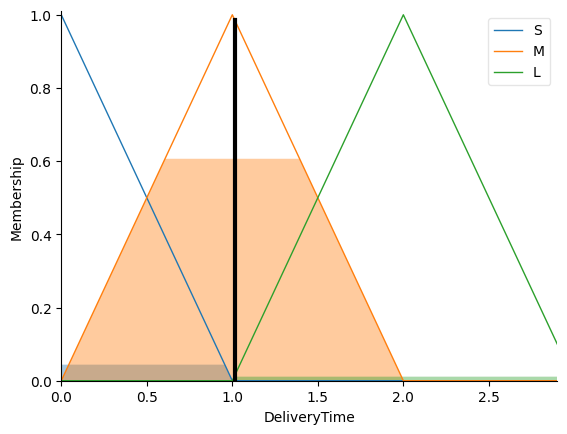

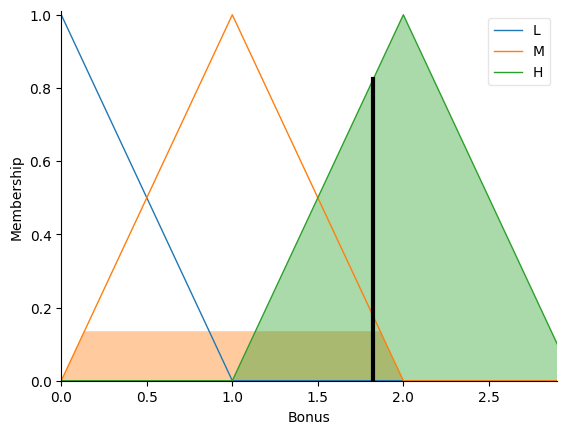

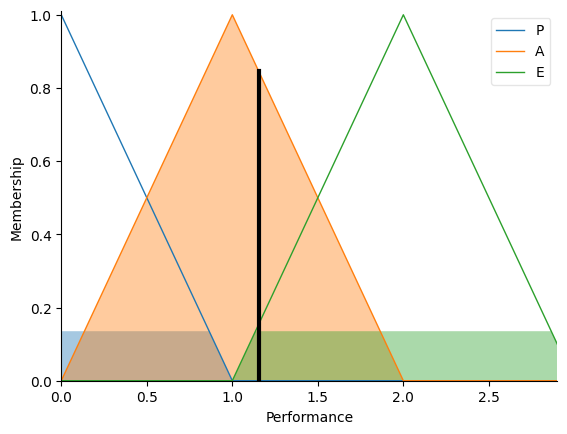

In [17]:
delivery_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
delivery_sim = ctrl.ControlSystemSimulation(delivery_ctrl)

delivery_sim.input['Traffic'] = 1
delivery_sim.input['Distance'] = 5
delivery_sim.input['Weather'] = 2
delivery_sim.input['PrepTime'] = 8
delivery_sim.input['Fatigue'] = 1

delivery_sim.compute()

print(delivery_sim.output['DeliveryTime'])
print(delivery_sim.output['Bonus'])
print(delivery_sim.output['Performance'])

deli.view(sim=delivery_sim)
bonus.view(sim=delivery_sim)
perf.view(sim=delivery_sim)